In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt

import torch
import tensorcraft as tc

matplotlib.rcParams["figure.dpi"] = 200

In [2]:
LATEX_WIDTH = 347.12354 # Doc
# LATEX_WIDTH = 444.14774 # Doc

figSize = tc.viz.latex2figSize(LATEX_WIDTH, fraction=1, ratio=1)
fontsize = 10
fontsize_small = 8

matplotlib.rcParams.update({
    "figure.figsize": figSize,
    "figure.dpi": 100,
    # "figure.autolayout": True,
    "text.usetex": True,
    "font.family": "serif",
    "font.size": fontsize,  
    "axes.labelsize": fontsize_small,
    "legend.fontsize": fontsize_small,
    "xtick.labelsize": fontsize_small,
    "ytick.labelsize": fontsize_small,

})


In [3]:
import networkx as nx
graph = nx.grid_graph(dim=(5,2))
graph.nodes()

NodeView(((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4)))

{(0, 0): tensor([-0.5000,  2.0000]), (0, 1): tensor([0., 2.]), (0, 2): tensor([0.5000, 2.0000]), (1, 0): tensor([-0.5000,  1.0000]), (1, 1): tensor([0., 1.]), (1, 2): tensor([0.5000, 1.0000])}


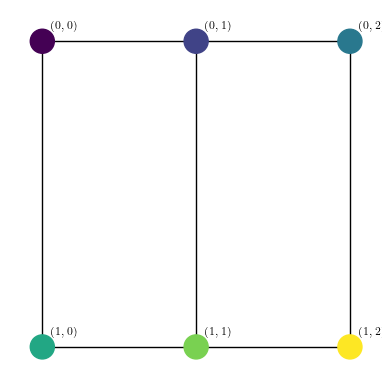

In [4]:
mesh = torch.Size((2,3))
fig = plt.figure()
tc.viz.draw_2d_mesh(fig.add_subplot(111), mesh )

ValueError: only one element tensors can be converted to Python scalars

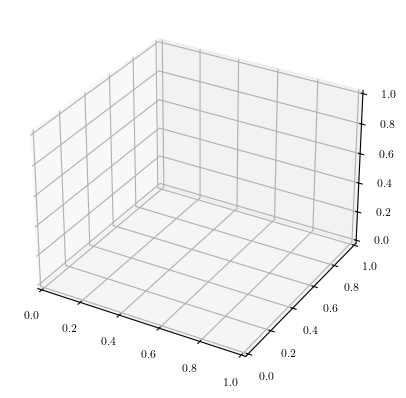

In [5]:
fig = plt.figure()
mesh = torch.Size((2,2,2))

tc.viz.draw_3d_mesh(fig.add_subplot(111, projection="3d"), mesh)

(15, 20, 12)


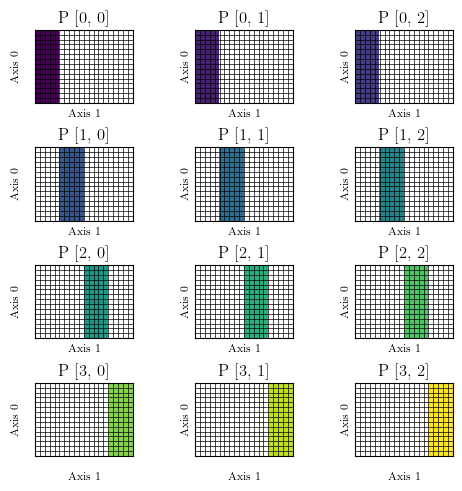

In [14]:
mesh = tc.Shape((4, 3))
d = tc.dist.MultiAxisDist(mesh, (tuple(), (0,)), (3, 0))
tensor = tc.Tensor((15, 20), dist=d)

processorArragement = tensor.dist.processorArrangement
subplot_x = processorArragement[0]
subplot_y = (
    processorArragement[1] if len(d.processorArrangement) > 1 else 1
)

fig = plt.figure(layout="constrained")
gs = fig.add_gridspec(nrows=subplot_x, ncols=subplot_y)
axs = gs.subplots(
    sharex=True,
    sharey=True,
)

for p in range(d.numProcessors):

    p_midx = d.getProcessorMultiIndex(p)
    tc.viz.draw_2d_processor_view(axs[p_midx[0], p_midx[1]], tensor, p)

(10, 20, 12)


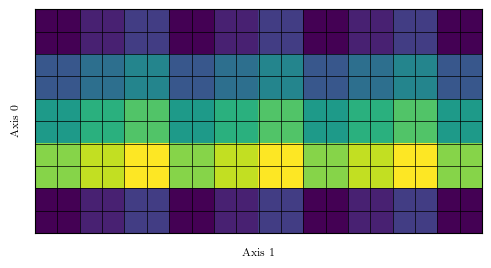

In [15]:
fig = plt.figure(layout="constrained")
d = tc.dist.MultiAxisDist(mesh, ((0,), (1,)), (2, 2))
tensor = tc.Tensor((10, 20), dist=d)
tc.viz.draw_2d_tensor(fig.add_subplot(111), tensor)

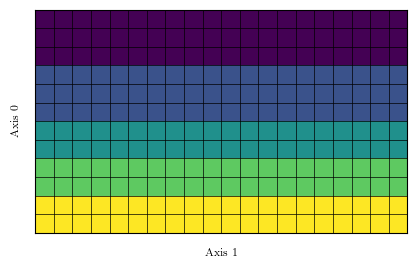

In [16]:
fig = plt.figure()

d = tc.dist.SlabDist(5, 0,0)
tensor = tc.Tensor((12, 20), dist=d)
tc.viz.draw_2d_tensor(fig.add_subplot(111), tensor)

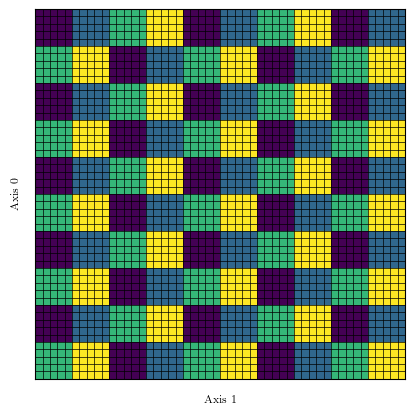

In [17]:
fig = plt.figure()
d = tc.dist.TileDist(4, 5)
tensor = tc.Tensor((50, 50), dist=d)
tc.viz.draw_2d_tensor(fig.add_subplot(111), tensor)

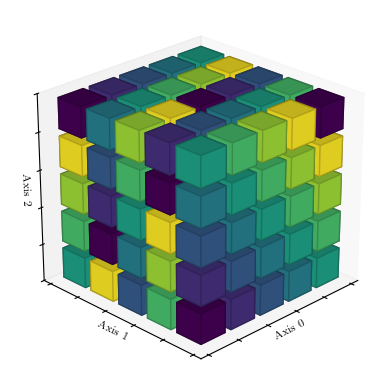

In [18]:
fig = plt.figure()
dist = tc.dist.TileDist(8, 1)
# dist = SlabDist(5, 0)
tensor = tc.Tensor((5, 5, 5), dist=dist)
tc.viz.draw_3d_tensor(fig.add_subplot(111, projection="3d"), tensor)

In [19]:
import networkx as nx
mesh = tc.Tensor((4,3))
graph = nx.grid_2d_graph(*mesh.shape)
graph

In [20]:
pos = nx.spring_layout(graph)
pos

{(0, 0): array([ 0.89468426, -0.46448331]),
 (0, 1): array([0.93745879, 0.00607989]),
 (0, 2): array([0.92002295, 0.47082246]),
 (1, 0): array([ 0.31213106, -0.28306543]),
 (1, 1): array([0.30874308, 0.00658895]),
 (1, 2): array([0.3401433 , 0.29394889]),
 (2, 0): array([-0.28408064,  0.25287046]),
 (2, 1): array([-0.41948389, -0.00304855]),
 (2, 2): array([-0.25897812, -0.25122943]),
 (3, 0): array([-0.8873102 ,  0.44377351]),
 (3, 1): array([-1.        , -0.01159781]),
 (3, 2): array([-0.86333058, -0.46065963])}

In [21]:
import numpy as np
shape = (10, 15, 7)

P = 4

tile_dims = np.zeros((len(shape), P))

for i in range(len(shape)):
    chunk = shape[i] // P
    remainder = shape[i] % P
    tile_dims[i] = chunk
    tile_dims[i][:remainder] += 1

tile_ends = np.cumsum(tile_dims[0])
print(tile_ends)
np.where(7 < tile_ends)[0][0]

[ 3.  6.  8. 10.]


np.int64(2)

In [22]:
tile_dims

array([[3., 3., 2., 2.],
       [4., 4., 4., 3.],
       [2., 2., 2., 1.]])